#Movie Ratings

We are going to address how to learn from movie ratings and decide whether key influential words (via NLP) can tell us whether movie ratings are favorable or not.  We will implement via the nltk package and use the standard movie ratings database of 1000 positive and 1000 negative reviews.

We could not properly read the multiple files of data from github, as will be explained, and, as such, we do the best we can given the restrictions - showing examples and using the database directly from nltk instead.

In [2]:
# import nltk library
import nltk

# download all of the optional NLTK components that do not get installed by default
nltk.download('all', halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

Initially I thought it would be easier to deal with the data in a numpy array, so I read it in this way, but since we need to use a pandas dataframe, I tried to switch to that.  I spent a very long time trying to figure out how to read each file into the pandas dataframe succesively. I attempted to use glob, but after some time I realized that explained it can't be used for websites.  I tried regex as well, but was unsuccessful.  As such, I was not able to read in the multiple files into a dataframe.  I will instead attempt to show what I can for partial credit.

These were the steps attempted to load the data.  Below the transformation of the data is discussed in detail. I use lower and string.punctuation - as explained below, to transform the data.

In [24]:
#reading individual files in to a numpy array
import pandas as pd
import numpy as np
import requests as req
import glob
import re

filename = "https://raw.githubusercontent.com/MatthewFried/MAT5001/main/M12/pos/cv000_29590.txt"
r = req.get(filename)
arr = np.array([c.strip() for c in r.text.splitlines()])

Since I don't have the real matrix, I am just showing an example of how to count sparsity in general.

In [ ]:
from numpy import array
from numpy import count_nonzero

A = array([[1,0,0,0,1,1,1,0], [1,1,1,1,0,0,0,0], [0,0,0,1,0,1,0,1], ,[0,1,1,1,1,1,1,0]])

# calculate sparsity
sparsity = 1.0 - ( count_nonzero(A) / float(A.size) )
print(sparsity)

Since I could not get the code to download from github, I am just showing various pieces of what is assigned, as best I can.

Below is code from [here](https://stackoverflow.com/questions/21107075/classification-using-movie-review-corpus-in-nltk-python) and from our class work - which is changed (to properly work in context) and to address points we are discussing.

In [66]:
import string
from itertools import chain
from nltk.corpus import movie_reviews as mr
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.classify import NaiveBayesClassifier as nbc
import nltk

#we can use stopwords to get rid of anything unnecessary
stop = stopwords.words('english')

#here we make it lower case via w.lower and check that it is not string.punctuation
#then we split it by the '/' which delineates the next review
#each review can be seen by documents[i]
documents = [([w for w in mr.words(i) if w.lower() not in stop and w.lower() not in string.punctuation], i.split('/')[0]) for i in mr.fileids()]

In [67]:
#to get the frequency of each word we can use chain to group a bunch of iterables together and output them as one
word_features = FreqDist(chain(*[i for i,j in documents]))

Here we plot the 30 most common words, we see that most of the most common words are rather useless (such as film, and movie), however to do our analysis we will extract these and then figure out what influences our positive or negative ratings.

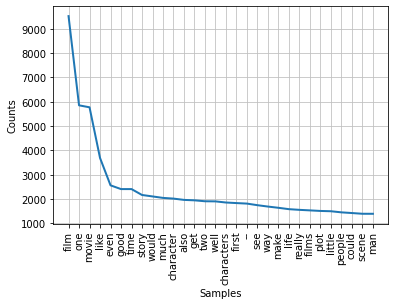

In [68]:
#plot the 30 most common words
plot_neg_freq = word_features.plot(30, cumulative=False)
plot_neg_freq

In [45]:
#get all the words and convert to a list to use
word_features = list(word_features.keys())

In [49]:
#get the number of elements in our list
len(word_features)

39586

In [52]:
#get the number of data of data points we will use for our modeling 
numtrain = int(len(documents) * 75 / 100)


## Testing the data via Naive Bayes

The below took 11m 28s to run. I am including the results here just in case:


Predictive power: 0.62

**Most Informative Features**
>                   hatred = True              pos : neg    =     14.0 : 1.0
                    deft = True              pos : neg    =     14.0 : 1.0
                   inept = True              neg : pos    =     13.8 : 1.0
               ludicrous = True              neg : pos    =     12.8 : 1.0
                 winslet = True              pos : neg    =     12.7 : 1.0



In [ ]:
train_set = [({i:(i in tokens) for i in word_features}, tag) for tokens,tag in documents[:numtrain]]
test_set = [({i:(i in tokens) for i in word_features}, tag) for tokens,tag in documents[numtrain:]]


#shuffle our documents
#this will, on average, provide a mix of positive and negative reviews in each category
shuffle(train_set)
shuffle(test_set)

#if the reader would like to see, just print each variable
#sample of training data
x = train_set[:3]

#sample of testing data
y = test_set[3:]

In [53]:
classifier = nbc.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)

0.62
Most Informative Features
                  hatred = True              pos : neg    =     14.0 : 1.0
                    deft = True              pos : neg    =     14.0 : 1.0
                   inept = True              neg : pos    =     13.8 : 1.0
               ludicrous = True              neg : pos    =     12.8 : 1.0
                 winslet = True              pos : neg    =     12.7 : 1.0


###Summary

In summary, I was not able to load the data into a dataframe via github because I could not read through multiple file names.  I assume there is some simple way to do it that I did not think of, but, given what I had to work with, I attempted to show how the material might still look.  

Overall, I cleaned the data as per our instructions and put it into a Naive Bayes model.  The score was not great, but perhaps another go at it would yield better results.  

The most intersting output is that 'winslet' yields negative results. 